### Recent FmSkill changes

- Reduced number of (user facing) classes: Observation, ModelResult, Comparer
- No more point / track observations & connectors
- All possible data input sources get parsed internally into an xarray Dataset
- This allows making use of metadata (e.g. for storing locations of extractions etc.)
- Also offers more possibilities for serialization & querying
- Reduced functionality to single item to reduce code maintainability

In [8]:
import mikeio

test = mikeio.open("tests/testdata/dmi_30357_Drogden_Fyr.dfs0")
isinstance(test, mikeio.Dfs0)

True

In [4]:
from fmskill.model import protocols
import pandas as pd
import mikeio
class Test(protocols.ModelResult):
    def __init__(self, name: str, item: str, asfldsa: str) -> None:
        print("hello")


    # name = "test"
    # item = "test"


    data = pd.DataFrame()
    # data = mikeio.open("tests/testdata/dmi_30357_Drogden_Fyr.dfs0")

    def compare(self, **kwargs):
        print("compare", kwargs)

    def extract(self, **kwargs) -> protocols.Comparable:
        print("extract", kwargs)
        return self

def test_1(inp: protocols.ModelResult):
    print("test_1", inp)

def test_2(inp: protocols.Comparable):
    print("test_2", inp)

def test_3(inp: protocols.Extractable):
    print("test_3", inp)



# test_1(Test("asdf", "asdf", "asdfs"))
# test_2(Test("asdf", "asdf"))
# test_3(Test("asf", "asdf"))
print(isinstance(Test("asfldsa", "sdf", "sadf"), protocols.ModelResult))
# print(isinstance(Test(), protocols.Comparable))
# print(isinstance(Test(), protocols.Extractable))

hello
True


In [7]:

test = Test("asfldsa", "sdf", "sadf")
isinstance(test, protocols.ModelResult)

hello


True

In [8]:
test.name

AttributeError: 'Test' object has no attribute 'name'

In [1]:
from fmskill import Observation, ModelResult, Comparer, metrics
from fmskill.data_container import DataContainer
import xarray as xr
fldr = 'tests/testdata/SW/'
o1 = Observation(fldr + 'HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = Observation(fldr + "eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = Observation(fldr + "Alti_c2_Dutch.dfs0", item=3, name="c2")

mr1 = ModelResult(fldr + 'HKZN_local_2017_DutchCoast.dfsu', name='SW_1', item=0)
mr2 = ModelResult(fldr + 'HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2', item=0)
fn = "tests/testdata/NorthSeaHD_extracted_track.dfs0"
mr3 = ModelResult(fn, item=2, name="HD")
c = Comparer([o1, o2], [mr1, mr2])
# c = Comparer([o1, o2, o3], [mr1, mr2])
# c = Comparer([o1, o2, o3], [mr1, mr2, mr3])
c.extract()

In [3]:
c.skill(quantity="asdf")

/home/paul/DHI/fmskill/fmskill/user_structures.py:250: UserWarning: No matching data found. Cannot calculate skill.
  warnings.warn("No matching data found. Cannot calculate skill.")


In [3]:
c[1]

<xarray.Dataset>
Dimensions:   (time: 67, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    variable  (source, time) float64 1.43 1.522 1.615 1.707 ... 3.23 3.36 3.23
Attributes:
    x:                 {'SW_1': 3.318004104185031, 'SW_2': 3.318004051844279,...
    y:                 {'SW_1': 51.971197090346344, 'SW_2': 51.97119776407877...
    observation_name:  EPL

In [3]:
c._select_subset(start_time='2017-10-28', model_result="SW_1")[1]

<xarray.Dataset>
Dimensions:   (source: 1, time: 43)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-28 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1'
Data variables:
    variable  (source, time) float64 1.532 1.644 1.756 ... 3.331 3.253 3.174
    bias      (source) float64 -0.0666
    rmse      (source) float64 0.2236
    urmse     (source) float64 0.2134
    mae       (source) float64 0.1885
    cc        (source) float64 0.9698
    si        (source) float64 0.08252
    r2        (source) float64 0.9326
Attributes:
    x:        {'SW_1': 3.318004104185031, 'SW_2': 3.318004051844279, 'EPL': 3...
    y:        {'SW_1': 51.971197090346344, 'SW_2': 51.971197764078774, 'EPL':...

In [3]:
c.quantity_source_mapping

defaultdict(set, {'Significant wave height': {'EPL', 'HKNA', 'SW_1', 'SW_2'}})

In [12]:
test = c.quantity_source_mapping["Significant wave height"]

In [4]:
test = {'EPL', 'HKNA', 'SW_1'}

In [5]:
test

{'EPL', 'HKNA', 'SW_1'}

In [6]:
c[0].source.isin(list(test))

<xarray.DataArray 'source' (source: 3)>
array([ True, False, False])
Coordinates:
  * source   (source) object 'SW_1' 'SW_2' 'Observation'

In [7]:
name_quant_lookup = {d.name: d.quantity for d in c.observations + c.results}

In [8]:
c[0].where(c[0].source.isin(test))

<xarray.Dataset>
Dimensions:   (source: 3, time: 386)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    variable  (source, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    bias      (source) float64 nan nan nan
    rmse      (source) float64 nan nan nan
    urmse     (source) float64 nan nan nan
    mae       (source) float64 nan nan nan
    cc        (source) float64 nan nan nan
    si        (source) float64 nan nan nan
    r2        (source) float64 nan nan nan
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [8]:
name_quant_lookup

{'HKNA': Significant wave height,
 'EPL': Significant wave height,
 'SW_1': Significant wave height,
 'SW_2': Significant wave height}

In [54]:
test

<xarray.Dataset>
Dimensions:   (time: 386, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    variable  (source, time) float64 1.58 1.592 1.604 1.616 ... 3.457 3.535 3.32
    bias      (source) float64 -0.189 -0.09478 0.0
    rmse      (source) float64 0.3507 0.2923 0.0
    urmse     (source) float64 0.2954 0.2765 0.0
    mae       (source) float64 0.2512 0.215 0.0
    cc        (source) float64 0.971 0.971 1.0
    si        (source) float64 0.0951 0.08903 0.0
    r2        (source) float64 0.906 0.9347 1.0
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [31]:
quant = list(map(name_quant_lookup.get, c[0].source.values.tolist()))

In [32]:
test: xr.Dataset = c[0]

In [48]:
test.variable.coords

Coordinates:
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source   (source) object 'SW_1' 'SW_2' 'Observation'

In [45]:
test.indexes.values()

ValuesView(Indexes:
    time     DatetimeIndex(['2017-10-27 00:00:00', '2017-10-27 00:10:00',
               '2017-10-27 00:20:00', '2017-10-27 00:30:00',
               '2017-10-27 00:40:00', '2017-10-27 00:50:00',
               '2017-10-27 01:00:00', '2017-10-27 01:10:00',
               '2017-10-27 01:20:00', '2017-10-27 01:30:00',
               ...
               '2017-10-29 16:30:00', '2017-10-29 16:40:00',
               '2017-10-29 16:50:00', '2017-10-29 17:00:00',
               '2017-10-29 17:10:00', '2017-10-29 17:20:00',
               '2017-10-29 17:30:00', '2017-10-29 17:40:00',
               '2017-10-29 17:50:00', '2017-10-29 18:00:00'],
              dtype='datetime64[ns]', name='time', length=386, freq=None)
    source   Index(['SW_1', 'SW_2', 'Observation'], dtype='object', name='source'))

In [34]:
new = test.assign_coords(quantity=quant)

In [42]:
new.isel(time=0, source=0).quantity

<xarray.DataArray 'quantity' (quantity: 3)>
array([Significant wave height, Significant wave height, None], dtype=object)
Coordinates:
    time      datetime64[ns] 2017-10-27
    source    <U4 'SW_1'
  * quantity  (quantity) object EUMType.Significant_wave_height ... None

In [40]:
new.sel(quantity=None)

<xarray.Dataset>
Dimensions:   (time: 386, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
    quantity  object None
Data variables:
    variable  (source, time) float64 1.58 1.592 1.604 1.616 ... 3.457 3.535 3.32
    bias      (source) float64 -0.189 -0.09478 0.0
    rmse      (source) float64 0.3507 0.2923 0.0
    urmse     (source) float64 0.2954 0.2765 0.0
    mae       (source) float64 0.2512 0.215 0.0
    cc        (source) float64 0.971 0.971 1.0
    si        (source) float64 0.0951 0.08903 0.0
    r2        (source) float64 0.906 0.9347 1.0
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [38]:
new.sel(source='SW_1').sizes

Frozen({'time': 386, 'quantity': 3})

In [17]:
test.source.map({"Observation": "o", "ModelResult": "m"})

AttributeError: 'DataArray' object has no attribute 'map'

In [10]:
mr3.quantity

Undefined

In [13]:
c_1 = Comparer([o1], [mr1])
c_1.extract()
c_2 = Comparer([o2], [mr2])
c_2.extract()

hold
hold


In [20]:
c_3[0]

<xarray.Dataset>
Dimensions:   (time: 386, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    variable  (source, time) float64 1.58 1.592 1.604 1.616 ... 3.457 3.535 3.32
    bias      (source) float64 -0.189 -0.09478 0.0
    rmse      (source) float64 0.3507 0.2923 0.0
    urmse     (source) float64 0.2954 0.2765 0.0
    mae       (source) float64 0.2512 0.215 0.0
    cc        (source) float64 0.971 0.971 1.0
    si        (source) float64 0.0951 0.08903 0.0
    r2        (source) float64 0.906 0.9347 1.0
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [19]:
c_3 = c_1 + c_2
c_3 = c_3 + o3
c_3.extract()
c_3.skill(observation='c2')

/home/paul/DHI/fmskill/fmskill/user_structures.py:142: UserWarning: Duplicate observation name: EPL. Please choose unique names.
  warnings.warn(
/home/paul/DHI/fmskill/fmskill/user_structures.py:152: UserWarning: Duplicate result name: SW_2. Please choose unique names.
  warnings.warn(
/home/paul/DHI/fmskill/fmskill/user_structures.py:142: UserWarning: Duplicate observation name: c2. Please choose unique names.
  warnings.warn(


hold


<xarray.Dataset>
Dimensions:      (observation: 3, model: 2)
Coordinates:
  * model        (model) object 'SW_1' 'SW_2'
  * observation  (observation) object 'c2' 'EPL' 'HKNA'
Data variables:
    bias         (observation, model) float64 -0.00121 0.08143 ... -0.09478
    rmse         (observation, model) float64 0.3518 0.4303 ... 0.3507 0.2923
    urmse        (observation, model) float64 0.3518 0.4225 ... 0.2954 0.2765
    mae          (observation, model) float64 0.2946 0.3571 ... 0.2512 0.215
    cc           (observation, model) float64 0.9743 0.9743 ... 0.971 0.971
    si           (observation, model) float64 0.1278 0.1535 ... 0.0951 0.08903
    r2           (observation, model) float64 0.8995 0.8497 ... 0.906 0.9347
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [2]:
c = c + o3

In [3]:
c.extract()

hold


In [4]:
c.skill()

<xarray.Dataset>
Dimensions:      (observation: 3, model: 2)
Coordinates:
  * model        (model) object 'SW_1' 'SW_2'
  * observation  (observation) object 'c2' 'EPL' 'HKNA'
Data variables:
    bias         (observation, model) float64 -0.00121 0.08143 ... -0.09478
    rmse         (observation, model) float64 0.3518 0.4303 ... 0.3507 0.2923
    urmse        (observation, model) float64 0.3518 0.4225 ... 0.2954 0.2765
    mae          (observation, model) float64 0.2946 0.3571 ... 0.2512 0.215
    cc           (observation, model) float64 0.9743 0.9743 ... 0.971 0.971
    si           (observation, model) float64 0.1278 0.1535 ... 0.0951 0.08903
    r2           (observation, model) float64 0.8995 0.8497 ... 0.906 0.9347
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [3]:
c.skill(observation="c2")

<xarray.Dataset>
Dimensions:      (observation: 1, model: 2)
Coordinates:
  * model        (model) object 'SW_2' 'SW_1'
  * observation  (observation) object 'c2'
Data variables:
    bias         (observation, model) float64 0.08143 -0.00121
    rmse         (observation, model) float64 0.4303 0.3518
    urmse        (observation, model) float64 0.4225 0.3518
    mae          (observation, model) float64 0.3571 0.2946
    cc           (observation, model) float64 0.9743 0.9743
    si           (observation, model) float64 0.1535 0.1278
    r2           (observation, model) float64 0.8497 0.8995

In [5]:
c["c2"]

<xarray.Dataset>
Dimensions:   (time: 113, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27T12:52:52.337000 ... 2017-10-29...
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    x         (time) float64 2.423 2.414 2.405 2.396 ... 0.8891 0.879 0.8689
    y         (time) float64 51.25 51.31 51.37 51.42 ... 55.11 55.17 55.23 55.28
    variable  (source, time) float64 1.416 1.495 1.495 ... 4.626 4.646 4.962
    bias      (source) float64 -0.00121 0.08143 0.0
    rmse      (source) float64 0.3518 0.4303 0.0
    urmse     (source) float64 0.3518 0.4225 0.0
    mae       (source) float64 0.2946 0.3571 0.0
    cc        (source) float64 0.9743 0.9743 1.0
    si        (source) float64 0.1278 0.1535 0.0
    r2        (source) float64 0.8995 0.8497 1.0

In [4]:
c[2][c.metric_names].to_dataframe()

,bias,rmse,urmse,mae,cc,si,r2
source,,,,,,,
SW_1,-0.001210,0.351797,0.351794,0.294585,0.974335,0.127776,0.899507
SW_2,0.081431,0.430268,0.422492,0.357138,0.974335,0.153454,0.849675
Observation,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


In [2]:
c.metrics

[<function fmskill.metrics.bias(obs, model) -> float>,
 <function fmskill.metrics.rmse(obs: numpy.ndarray, model: numpy.ndarray, weights: numpy.ndarray = None, unbiased: bool = False) -> float>,
 <function fmskill.metrics.urmse(obs: numpy.ndarray, model: numpy.ndarray, weights: numpy.ndarray = None) -> float>,
 <function fmskill.metrics.mae(obs: numpy.ndarray, model: numpy.ndarray, weights: numpy.ndarray = None) -> float>,
 <function fmskill.metrics.cc(obs: numpy.ndarray, model: numpy.ndarray, weights=None) -> float>,
 <function fmskill.metrics.si(obs: numpy.ndarray, model: numpy.ndarray) -> float>,
 <function fmskill.metrics.r2(obs: numpy.ndarray, model: numpy.ndarray) -> float>]

In [2]:
test = c[0]
test

<xarray.Dataset>
Dimensions:   (time: 386, source: 3)
Coordinates:
  * time      (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source    (source) object 'SW_1' 'SW_2' 'Observation'
Data variables:
    variable  (source, time) float64 1.58 1.592 1.604 1.616 ... 3.457 3.535 3.32
Attributes:
    x:        {'SW_1': 4.194122318081766, 'SW_2': 4.194122473398845, 'HKNA': ...
    y:        {'SW_1': 52.67129489798922, 'SW_2': 52.671295166015625, 'HKNA':...

In [3]:
test.variable.sel(source="Observation")

<xarray.DataArray 'variable' (time: 386)>
array([1.38671994, 1.46484005, 1.50390995, 1.44531   , 1.44531   ,
       1.52344   , 1.54296994, 1.50390995, 1.46484005, 1.52344   ,
       1.5625    , 1.58203006, 1.66015995, 1.66015995, 1.62109005,
       1.5625    , 1.73828006, 1.77734005, 1.81640995, 1.73828006,
       1.71875   , 1.75781   , 1.71875   , 1.81640995, 1.93359005,
       1.95311999, 1.85546994, 1.81640995, 1.93359005, 1.97265995,
       2.05078006, 1.875     , 1.99219   , 2.08983994, 2.26561999,
       2.28516006, 2.10938001, 2.14843988, 2.38281012, 2.40233994,
       2.34375   , 2.48046994, 2.63671994, 2.55858994, 2.55858994,
       2.51953006, 2.57811999, 2.40233994, 2.55858994, 2.57811999,
       2.34375   , 2.44141006, 2.51953006, 2.67578006, 2.91016006,
       2.63671994, 2.44141006, 2.38281012, 2.34375   , 2.55858994,
       2.51953006, 2.40233994, 2.51953006, 2.42188001, 2.53906012,
       2.5       , 2.46093988, 2.46093988, 2.36328006, 2.38281012,
       2.32421994, 2.22656012, 2.07031012, 2.24608994, 2.48046994,
       2.46093988, 2.28516006, 2.05078006, 2.30468988, 2.26561999,
       2.30468988, 2.38281012, 2.38281012, 2.1875    , 2.20703006,
       2.24608994, 2.16796994, 2.14843988, 2.07031012, 2.10938001,
       2.26561999, 2.10938001, 2.08983994, 2.07031012, 2.10938001,
       2.20703006, 1.99219   , 1.99219   , 2.05078006, 2.03125   ,
...
       4.6875    , 4.76562023, 4.43358994, 4.27733994, 4.49218988,
       4.6875    , 4.76562023, 4.72656012, 5.13672018, 5.25391006,
       5.23437977, 5.66406012, 5.50781012, 5.35156012, 5.15625   ,
       5.27343988, 5.80077982, 5.54687977, 5.72266006, 5.25391006,
       5.64452982, 5.74218988, 5.99608994, 5.91797018, 5.39062023,
       4.96093988, 4.84375   , 4.60937977, 4.88281012, 5.11718988,
       5.37108994, 4.90233994, 5.13672018, 5.07812023, 4.92187977,
       5.42968988, 5.50781012, 5.03906012, 4.84375   , 4.35547018,
       4.49218988, 4.72656012, 4.94141006, 5.19531012, 5.11718988,
       5.01952982, 5.15625   , 4.88281012, 4.84375   , 4.92187977,
       4.88281012, 4.51172018, 4.58983994, 4.80468988, 4.45312023,
       4.23827982, 4.21875   , 4.49218988, 4.66797018, 4.58983994,
       4.35547018, 4.31641006, 4.12108994, 4.23827982, 4.53125   ,
       4.80468988, 4.45312023, 4.60937977, 4.31641006, 4.41406012,
       4.39452982, 4.10156012, 4.04297018, 4.33593988, 4.6875    ,
       4.47266006, 4.14062023, 4.14062023, 3.65233994, 4.10156012,
       4.02343988, 3.63281012, 3.73046994, 3.57421994, 3.75      ,
       3.78906012, 3.63281012, 3.41796994, 3.61328006, 3.57421994,
       3.49608994, 3.51561999, 3.47656012, 3.45703006, 3.53516006,
       3.32031012])
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
    source   <U11 'Observation'

In [11]:
test.

<xarray.DataArray 'data' (source: 3, time: 386)>
array([[1.57972872, 1.59166098, 1.60359323, ..., 3.28909636, 3.26934838,
        3.24960041],
       [1.58030975, 1.5930773 , 1.60584486, ..., 3.40933323, 3.38820267,
        3.36707234],
       [1.38671994, 1.46484005, 1.50390995, ..., 3.45703006, 3.53516006,
        3.32031012]])
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
  * source   (source) object 'SW_1' 'SW_2' 'Observation'

In [33]:
import xarray as xr
obs = test.variable.sel(source="Observation").values

def _test(x):
    bla = metrics.bias(obs, x.variable.values)
    return xr.DataArray(bla)

In [34]:
test.groupby("source")["SW_1"].source.item()

'SW_1'

In [35]:
test.groupby("source").map(_test)

<xarray.DataArray (source: 3)>
array([ 0.        , -0.18898564, -0.09478224])
Coordinates:
  * source   (source) object 'Observation' 'SW_1' 'SW_2'

In [4]:
for name, group in test.groupby("source"):
    print(name)
    print(group.variable.values)

Observation
[[1.38671994 1.46484005 1.50390995 1.44531    1.44531    1.52344
  1.54296994 1.50390995 1.46484005 1.52344    1.5625     1.58203006
  1.66015995 1.66015995 1.62109005 1.5625     1.73828006 1.77734005
  1.81640995 1.73828006 1.71875    1.75781    1.71875    1.81640995
  1.93359005 1.95311999 1.85546994 1.81640995 1.93359005 1.97265995
  2.05078006 1.875      1.99219    2.08983994 2.26561999 2.28516006
  2.10938001 2.14843988 2.38281012 2.40233994 2.34375    2.48046994
  2.63671994 2.55858994 2.55858994 2.51953006 2.57811999 2.40233994
  2.55858994 2.57811999 2.34375    2.44141006 2.51953006 2.67578006
  2.91016006 2.63671994 2.44141006 2.38281012 2.34375    2.55858994
  2.51953006 2.40233994 2.51953006 2.42188001 2.53906012 2.5
  2.46093988 2.46093988 2.36328006 2.38281012 2.32421994 2.22656012
  2.07031012 2.24608994 2.48046994 2.46093988 2.28516006 2.05078006
  2.30468988 2.26561999 2.30468988 2.38281012 2.38281012 2.1875
  2.20703006 2.24608994 2.16796994 2.14843988 2.07

In [ ]:
test.map(lambda x: metrics.bias(x.data.sel(source="Observation"), ))

In [19]:
test.sel(source="Observation").data.values.shape

(386,)

In [7]:
test.variable.groupby("source").map(lambda x: metrics.bias(test.sel(source="Observation").variable.values, x.variable.values))

AttributeError: 'numpy.float64' object has no attribute 'dims'

In [13]:
test = c[2][["Observation", "SW_1", "SW_2"]].to_array(dim="model")

In [14]:
c[2]["test"] = test

In [15]:
c[2]

<xarray.Dataset>
Dimensions:      (time: 113, model: 3)
Coordinates:
  * time         (time) datetime64[ns] 2017-10-27T12:52:52.337000 ... 2017-10...
  * model        (model) object 'Observation' 'SW_1' 'SW_2'
Data variables:
    x            (time) float64 2.423 2.414 2.405 2.396 ... 0.8891 0.879 0.8689
    y            (time) float64 51.25 51.31 51.37 51.42 ... 55.17 55.23 55.28
    Observation  (time) float64 1.638 1.383 1.791 1.7 ... 4.626 4.646 4.962
    SW_1         (time) float32 1.416 1.495 1.495 1.495 ... 5.246 5.246 5.246
    SW_2         (time) float32 1.405 1.489 1.489 1.489 ... 5.503 5.503 5.503
    test         (model, time) float64 1.638 1.383 1.791 ... 5.503 5.503 5.503

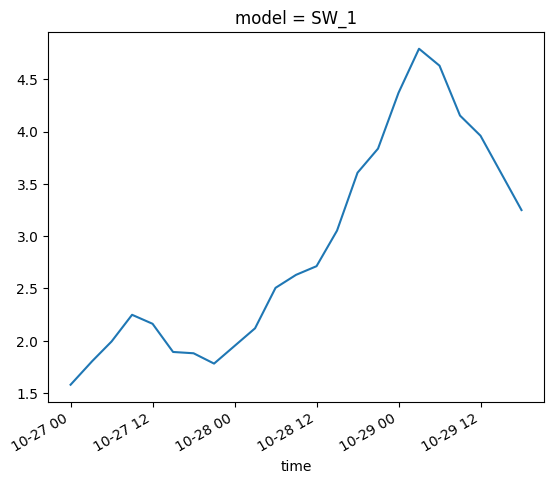

In [17]:
bla.sel(model="SW_1").plot()

In [21]:
bla.sel(model="SW_2").shape

(386,)

In [22]:
bla.shape

(2, 386)

In [7]:
metrics.bias(c[0].Hm0.values, c[0].SW_1.values)

-0.18898564330036777

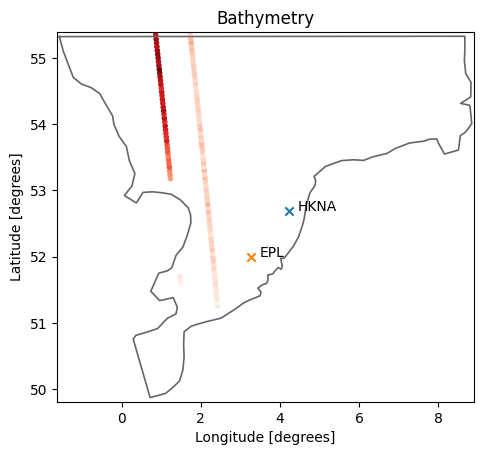

In [4]:
c.plot_observation_positions();

<AxesSubplot: >

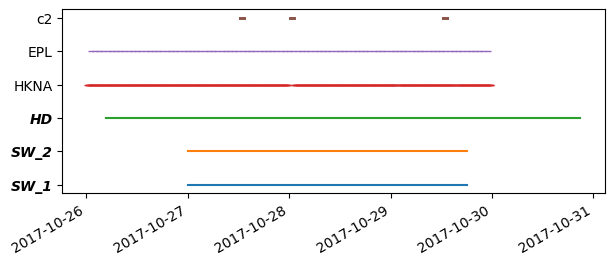

In [5]:
c.plot_temporal_coverage(limit_to_model_period=False)

In [16]:
c["c2"]

<xarray.Dataset>
Dimensions:  (time: 113)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27T12:52:52.337000 ... 2017-10-29T...
Data variables:
    x        (time) float64 2.423 2.414 2.405 2.396 ... 0.8891 0.879 0.8689
    y        (time) float64 51.25 51.31 51.37 51.42 ... 55.11 55.17 55.23 55.28
    swh      (time) float64 1.638 1.383 1.791 1.7 ... 4.888 4.626 4.646 4.962
    SW_1     (time) float32 1.416 1.495 1.495 1.495 ... 5.246 5.246 5.246 5.246
    SW_2     (time) float32 1.405 1.489 1.489 1.489 ... 5.503 5.503 5.503 5.503

In [18]:
c["ep"]

<xarray.Dataset>
Dimensions:  (time: 67)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27 ... 2017-10-29T18:00:00
Data variables:
    Hm0      (time) float64 0.92 1.03 1.24 1.34 1.55 ... 3.24 3.23 3.36 3.23
    SW_1     (time) float32 1.43 1.522 1.615 1.707 ... 3.41 3.331 3.253 3.174
    SW_2     (time) float32 1.42 1.519 1.618 1.716 ... 3.539 3.455 3.37 3.286
Attributes:
    x:        {'SW_1': 3.318004104185031, 'SW_2': 3.318004051844279, 'EPL': 3...
    y:        {'SW_1': 51.971197090346344, 'SW_2': 51.971197764078774, 'EPL':...

In [14]:
# from fmskill.skill import AggregatedSkill
# from fmskill import metrics

# test = c[0]
# test["bias"] = metrics.mae(test["Hm0"].values, test["SW_1"].values)
# test